In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Question 1 - Blood Pressure

In [2]:
bp = pd.read_csv('bloodpres.txt', sep=" ")

In [3]:
bp.head()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95


In [4]:
bp.shape

(20, 7)

## 1. Show highest correlation

<AxesSubplot:>

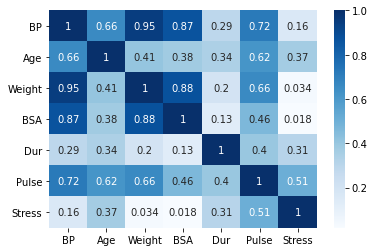

In [5]:
sns.heatmap(bp.corr(),cmap='Blues', annot=True)

In [6]:
bpcorr = bp.corr()['BP']
bpcorr.drop('BP',inplace=True)
bpcorr.head()

Age       0.659093
Weight    0.950068
BSA       0.865879
Dur       0.292834
Pulse     0.721413
Name: BP, dtype: float64

In [7]:
print(bpcorr.idxmax())
bpcorr.max()

Weight


0.9500676517041239

## 2. Simple Linear Regression

In [8]:
x=bp[['Weight']]
y=bp[['BP']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, test_size=0.30, random_state=42)

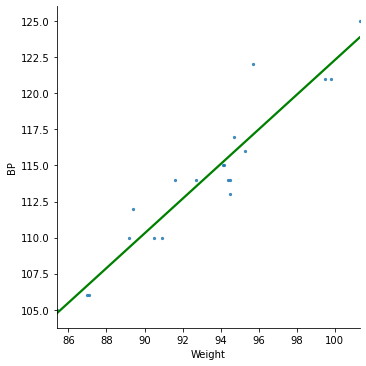

In [9]:
sns.lmplot(data=bp, x='Weight', y='BP', ci=None,
           scatter_kws={'s':5}, line_kws={'color':'green'})

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
model.score(x_test, y_test)

0.8790827284472343

In [12]:
model.score(x_train, y_train)

0.9001944583338779

+ R squared value test data: 0.8791
+ R squared value train data: 0.9001

In [13]:
y_predicted = model.predict(x_test)
y_predicted

array([[104.57760821],
       [116.10205921],
       [116.10205921],
       [115.72213226],
       [109.39001632],
       [122.43417515]])

In [14]:
predicted = pd.DataFrame(y_predicted,columns=['BP_predicted'])
predicted

,BP_predicted
0,104.577608
1,116.102059
2,116.102059
3,115.722132
4,109.390016
5,122.434175


In [15]:
combine = predicted.join([x_test.reset_index(drop=True),
                          y_test.reset_index(drop=True)])
combine

,BP_predicted,Weight,BP
0,104.577608,85.4,105
1,116.102059,94.5,113
2,116.102059,94.5,114
3,115.722132,94.2,115
4,109.390016,89.2,110
5,122.434175,99.5,121


In [16]:
melted = pd.melt(combine, id_vars=['Weight'], 
                 value_vars=['BP','BP_predicted'], 
                 var_name='BP_type',
                 value_name='BP_value')
melted

,Weight,BP_type,BP_value
0,85.4,BP,105.000000
1,94.5,BP,113.000000
2,94.5,BP,114.000000
3,94.2,BP,115.000000
4,89.2,BP,110.000000
5,99.5,BP,121.000000
6,85.4,BP_predicted,104.577608
7,94.5,BP_predicted,116.102059
8,94.5,BP_predicted,116.102059
9,94.2,BP_predicted,115.722132


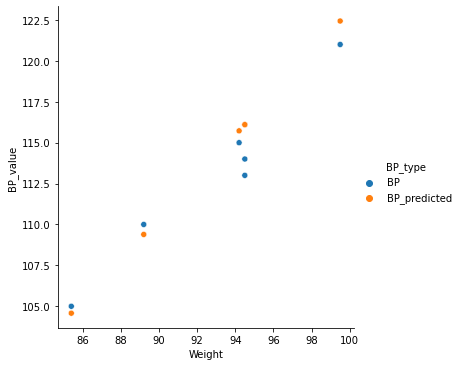

In [17]:
sns.relplot(data=melted, x='Weight', y='BP_value', 
            hue='BP_type')

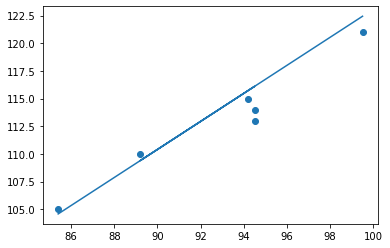

In [18]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predicted)
plt.show()

## 3. Multiple Regression Model

In [19]:
xCols = ['Age','Weight','BSA','Dur','Pulse','Stress']

In [20]:
scaler = StandardScaler()
bp[xCols]=scaler.fit_transform(bp[xCols])

In [21]:
xtrain, xtest,ytrain,ytest = train_test_split(bp[xCols],bp['BP'], train_size=0.70, test_size=0.30, random_state=42)

In [22]:
model.fit(xtrain, ytrain)

LinearRegression()

In [23]:
model.score(xtrain,ytrain)

0.9965117389955014

In [24]:
model.score(xtest,ytest)

0.9889422641142027

+ R squared value test data: 0.9889
+ R squared value train data: 0.9965

In [25]:
yPredicted=model.predict(xtest)
yPredicted

array([104.71363235, 112.45789062, 113.28238383, 115.57295833,
       109.91172328, 120.41411393])

In [26]:
predicted = pd.DataFrame(yPredicted, columns=['predictedBP'])

In [27]:
final = predicted.join([xtest.reset_index(drop=True),
                       ytest.reset_index(drop=True)])
final

,predictedBP,Age,Weight,BSA,Dur,Pulse,Stress,BP
0,104.713632,-0.656488,-1.837008,-1.864293,-0.636072,-1.780535,-0.562974,105
1,112.457891,-1.066793,0.336825,-0.736696,-1.018672,0.107911,-1.143930,113
2,113.282384,-1.066793,0.336825,-0.135312,0.463902,-0.161867,1.152230,114
3,115.572958,0.164122,0.265160,0.766766,-1.257797,0.107911,-1.088601,115
4,109.911723,0.164122,-0.929254,-1.262908,0.320427,-0.161867,0.239299,110
5,120.414114,-0.246183,1.531238,1.894362,1.372577,0.377689,-1.199260,121


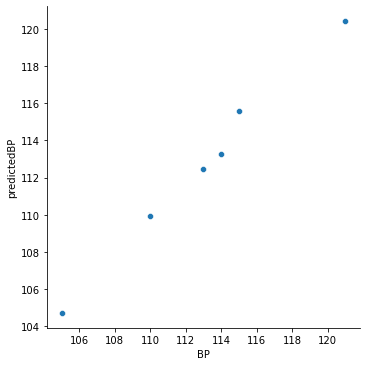

In [28]:
sns.relplot(data=final,x='BP',y='predictedBP',kind='scatter')

## 4. Multiple Regression Model with 2~5 features

In [29]:
bp.corr()['BP'].sort_values()

Stress    0.163901
Dur       0.292834
Age       0.659093
Pulse     0.721413
BSA       0.865879
Weight    0.950068
BP        1.000000
Name: BP, dtype: float64

In [30]:
xTrain, xTest,yTrain,yTest = train_test_split(bp[['Weight','BSA','Pulse','Age','Dur']],
                                              bp['BP'], train_size=0.70, test_size=0.30, random_state=42)

In [31]:
model.fit(xTrain, yTrain)

LinearRegression()

In [32]:
model.score(xTrain,yTrain)

0.9963842877617444

In [33]:
model.score(xTest,yTest)

0.9853247485841777

In this case the more the better R squared value:
- R squared value test data: 0.9853(vs. 0.9889)
- R squared value train data: 0.9963 (vs. 0.9965)

In [34]:
y_Predicted=model.predict(xTest)
y_Predicted

array([104.63109412, 112.45266561, 113.0642548 , 115.75738779,
       109.85993523, 120.5765077 ])

In [35]:
predicted = pd.DataFrame(y_Predicted,columns=['BP_Predicted'])
predicted

,BP_Predicted
0,104.631094
1,112.452666
2,113.064255
3,115.757388
4,109.859935
5,120.576508


In [36]:
final = predicted.join([xtest.reset_index(drop=True),
                       ytest.reset_index(drop=True)])
final

,BP_Predicted,Age,Weight,BSA,Dur,Pulse,Stress,BP
0,104.631094,-0.656488,-1.837008,-1.864293,-0.636072,-1.780535,-0.562974,105
1,112.452666,-1.066793,0.336825,-0.736696,-1.018672,0.107911,-1.143930,113
2,113.064255,-1.066793,0.336825,-0.135312,0.463902,-0.161867,1.152230,114
3,115.757388,0.164122,0.265160,0.766766,-1.257797,0.107911,-1.088601,115
4,109.859935,0.164122,-0.929254,-1.262908,0.320427,-0.161867,0.239299,110
5,120.576508,-0.246183,1.531238,1.894362,1.372577,0.377689,-1.199260,121


# Question 2 _ Bike Data

In [37]:
bike = pd.read_csv('bikeshare.csv')

In [38]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## 1-Missing Data Check

In [39]:
bike.shape

(17379, 17)

In [40]:
bike.dropna()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [41]:
bike.shape

(17379, 17)

After dropping there are nothing drop which show there are no null.

## 2 - Categorical and Numerical Data

In [42]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [43]:
bike.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Categorical:
#### Nominal
    + weathersit

#### Ordinal
   + season
   + mnth
   + instant
   + hr
   + weekday
   + dteday

#### Dichotomous
    + yr
    + holiday
    + workingday

### Numerical
- instant         int64
- season          int64
- yr              int64
- mnth            int64
- hr              int64
- holiday         int64
- weekday         int64
- workingday      int64
- weathersit      int64
- temp          float64
- atemp         float64
- hum           float64
- windspeed     float64
- casual          int64
- registered      int64
- cnt             int64

## 3 - Correlation

In [44]:
bikecorr=bike.corr()['cnt'].sort_values()

In [45]:
bikecorr.drop('cnt',inplace=True)
bikecorr

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
Name: cnt, dtype: float64

In [46]:
print(bikecorr.idxmax())
bikecorr.max()

registered


0.9721507308642957

## 4 - Simple Linear Regression

In [47]:
bikex_train, bikex_test, bikey_train, bikey_test = train_test_split(bike[['registered']],
                                                    bike[['cnt']], train_size=0.70, test_size=0.30, random_state=42)

In [48]:
model.fit(bikex_train,bikey_train)

LinearRegression()

In [49]:
model.score(bikex_test,bikey_test)

0.9429225195852444

In [50]:
model.score(bikex_train,bikey_train)

0.945931469221602

- R squared value test data: 0.9429
- R squared value train data: 0.9459

In [51]:
bikey_predicted=model.predict(bikex_test)
bikey_predicted

array([[289.94243777],
       [107.1037244 ],
       [ 13.93750103],
       ...,
       [393.58986128],
       [328.37350492],
       [ 94.29336869]])

In [52]:
predicted = pd.DataFrame(y_predicted, columns=['predictedCNT'])

In [53]:
finalBike = predicted.join([bikex_test.reset_index(drop=True), 
                        bikey_test.reset_index(drop=True)])
finalBike

,predictedCNT,registered,cnt
0,104.577608,240,425
1,116.102059,83,88
2,116.102059,3,4
3,115.722132,457,526
4,109.390016,8,13
5,122.434175,20,32


## 5. Not Relevant Features

In [54]:
bike.corr()['cnt'].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [55]:
# remove data that irrelevant not irrelevant
# instant, dteday is record index and the date which did not provided much information
# workingday, weekday, hum are insignificant correlation to cnt
# atemp is dependent variable on temp
col = ['instant','dteday','workingday','weekday','hr','atemp','hum']
bikeFinal= bike.drop(col,axis=1)
bikeFinal

,season,yr,mnth,holiday,weathersit,temp,windspeed,casual,registered,cnt
0,1,0,1,0,1,0.24,0.0000,3,13,16
1,1,0,1,0,1,0.22,0.0000,8,32,40
2,1,0,1,0,1,0.22,0.0000,5,27,32
3,1,0,1,0,1,0.24,0.0000,3,10,13
4,1,0,1,0,1,0.24,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,0,2,0.26,0.1642,11,108,119
17375,1,1,12,0,2,0.26,0.1642,8,81,89
17376,1,1,12,0,1,0.26,0.1642,7,83,90
17377,1,1,12,0,1,0.26,0.1343,13,48,61


## 6. Dummy Variable

In [56]:
categorical_new = ['season', 'yr', 'mnth','holiday','weathersit']

for i in categorical_new:
    bikeFinal[i] = bikeFinal[i].astype('category')

# Checking our new Data Type:

bikeFinal.dtypes

season        category
yr            category
mnth          category
holiday       category
weathersit    category
temp           float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [57]:
dummiesCol = ['season','yr','mnth','holiday','weathersit']
bikeFinal = pd.get_dummies(bikeFinal,drop_first=True)
bikeFinal

,temp,windspeed,casual,registered,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.0000,3,13,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.22,0.0000,8,32,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.22,0.0000,5,27,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.24,0.0000,3,10,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.0000,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.1642,11,108,119,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
17375,0.26,0.1642,8,81,89,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
17376,0.26,0.1642,7,83,90,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
17377,0.26,0.1343,13,48,61,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# 7. Collinear Column

In [58]:
bikeFinal.corr()['cnt'].sort_values()

weathersit_3   -0.128034
mnth_2         -0.122113
mnth_12        -0.079415
mnth_3         -0.057131
weathersit_2   -0.046902
holiday_1      -0.030927
mnth_11        -0.020074
weathersit_4   -0.008340
mnth_4         -0.003645
season_4        0.029421
mnth_10         0.054406
mnth_5          0.056422
season_2        0.060692
mnth_7          0.071459
mnth_8          0.081657
mnth_6          0.084600
mnth_9          0.084931
windspeed       0.093234
season_3        0.151621
yr_1            0.250495
temp            0.404772
casual          0.694564
registered      0.972151
cnt             1.000000
Name: cnt, dtype: float64

In [59]:
#drop casual and registered because cnt is the sum of casual and registered and very close to the cnt
bikeFinal.drop(columns=['casual','registered'],inplace=True)

## 8. No Significant Feature

In [60]:
col = ['cnt','temp','windspeed']
scaler = StandardScaler()
bikeFinal[col]= scaler.fit_transform(bikeFinal[col])

In [61]:
bikeFinal.corr()[['cnt']].sort_values(by='cnt')

,cnt
weathersit_3,-0.128034
mnth_2,-0.122113
mnth_12,-0.079415
mnth_3,-0.057131
weathersit_2,-0.046902
holiday_1,-0.030927
mnth_11,-0.020074
weathersit_4,-0.008340
mnth_4,-0.003645
season_4,0.029421


In [62]:
bikeFinal=bikeFinal.drop(['weathersit_3','mnth_2','mnth_12','mnth_3','weathersit_2','holiday_1','mnth_11','weathersit_4','mnth_4'],axis=1)
bikeFinal

,temp,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10
0,-1.334648,-1.553889,-0.956339,0,0,0,0,0,0,0,0,0,0
1,-1.438516,-1.553889,-0.824022,0,0,0,0,0,0,0,0,0,0
2,-1.438516,-1.553889,-0.868128,0,0,0,0,0,0,0,0,0,0
3,-1.334648,-1.553889,-0.972879,0,0,0,0,0,0,0,0,0,0
4,-1.334648,-1.553889,-1.039037,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,-1.230779,-0.211691,-0.388478,0,0,0,1,0,0,0,0,0,0
17375,-1.230779,-0.211691,-0.553875,0,0,0,1,0,0,0,0,0,0
17376,-1.230779,-0.211691,-0.548361,0,0,0,1,0,0,0,0,0,0
17377,-1.230779,-0.456099,-0.708245,0,0,0,1,0,0,0,0,0,0


## 9. Multiple Regression Model

In [63]:
bikeCol = bikeFinal.drop(['cnt'],axis=1)
bikeCol

,temp,windspeed,season_2,season_3,season_4,yr_1,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10
0,-1.334648,-1.553889,0,0,0,0,0,0,0,0,0,0
1,-1.438516,-1.553889,0,0,0,0,0,0,0,0,0,0
2,-1.438516,-1.553889,0,0,0,0,0,0,0,0,0,0
3,-1.334648,-1.553889,0,0,0,0,0,0,0,0,0,0
4,-1.334648,-1.553889,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,-1.230779,-0.211691,0,0,0,1,0,0,0,0,0,0
17375,-1.230779,-0.211691,0,0,0,1,0,0,0,0,0,0
17376,-1.230779,-0.211691,0,0,0,1,0,0,0,0,0,0
17377,-1.230779,-0.456099,0,0,0,1,0,0,0,0,0,0


In [64]:
x_train, x_test, y_train, y_test = train_test_split(bikeCol,
                                                    bikeFinal[['cnt']],  train_size=0.70, test_size=0.30, random_state=42)

In [65]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [66]:
model.score(x_train,y_train)

0.2715665010043308

In [67]:
model.score(x_test,y_test)

0.25661601670307954

- R squared value test data: 0.2566
- R squared value train data: 0.2716

In [68]:
y_predicted = model.predict(x_test)

In [69]:
predicted = pd.DataFrame(y_predicted, columns=['predictedCNT'])

In [70]:
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final

,predictedCNT,temp,windspeed,season_2,season_3,season_4,yr_1,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,cnt
0,0.840831,1.573679,0.031899,0,1,0,1,0,1,0,0,0,0,1.298566
1,-0.389485,-1.334648,0.276306,0,0,0,1,0,0,0,0,0,0,-0.559388
2,-0.504295,-0.919172,0.764304,0,0,1,0,0,0,0,0,0,1,-1.022498
3,1.164348,1.469810,1.374096,1,0,0,1,1,0,0,0,0,0,1.855400
4,-0.675143,-1.230779,1.618504,0,0,0,0,0,0,0,0,0,0,-0.972879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,0.928661,1.677548,-0.456099,1,0,0,1,0,1,0,0,0,0,-0.123844
5210,-0.164757,-0.607566,-1.553889,1,0,0,1,0,0,0,0,0,0,0.135277
5211,0.861966,1.573679,0.276306,0,1,0,1,0,1,0,0,0,0,2.020797
5212,0.721025,0.119516,0.031899,0,0,1,1,0,0,0,0,0,0,0.675572


## 10. Multiple Regression Model with fewer features

In [71]:
bikeFinal.corr()['cnt'].sort_values()

season_4     0.029421
mnth_10      0.054406
mnth_5       0.056422
season_2     0.060692
mnth_7       0.071459
mnth_8       0.081657
mnth_6       0.084600
mnth_9       0.084931
windspeed    0.093234
season_3     0.151621
yr_1         0.250495
temp         0.404772
cnt          1.000000
Name: cnt, dtype: float64

In [72]:
x_train, x_test, y_train, y_test = train_test_split(bikeFinal[['temp','windspeed','yr_1','season_3']],
                                                    bikeFinal[['cnt']],  train_size=0.70, test_size=0.30, random_state=42)

In [73]:
model.fit(x_train,y_train)

LinearRegression()

In [74]:
model.score(x_train,y_train)

0.2464356353114665

In [75]:
model.score(x_test,y_test)

0.23972061793498256

R squared value for train is 0.2464
R squared value for test is 0.2397

In [76]:
y_predicted = model.predict(x_test)
y_predicted

array([[ 0.76692126],
       [-0.29810535],
       [-0.52918577],
       ...,
       [ 0.78919456],
       [ 0.40639628],
       [-0.59469953]])

In [77]:
predicted = pd.DataFrame(y_predicted, columns=['predictedcnt'])

In [78]:
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final

,predictedcnt,temp,windspeed,yr_1,season_3,cnt
0,0.766921,1.573679,0.031899,1,1,1.298566
1,-0.298105,-1.334648,0.276306,1,0,-0.559388
2,-0.529186,-0.919172,0.764304,0,0,-1.022498
3,1.203576,1.469810,1.374096,1,0,1.855400
4,-0.607078,-1.230779,1.618504,0,0,-0.972879
...,...,...,...,...,...,...
5209,1.140612,1.677548,-0.456099,1,0,-0.123844
5210,-0.101507,-0.607566,-1.553889,1,0,0.135277
5211,0.789195,1.573679,0.276306,1,1,2.020797
5212,0.406396,0.119516,0.031899,1,0,0.675572


## 11. Extra Credit

In [79]:
Train, Test = train_test_split(bikeFinal, train_size=0.70, test_size=0.30, random_state=42)

In [80]:
fs = SelectKBest(score_func=mutual_info_regression, k=5)
fs.fit(Train.drop(columns=['cnt']), Train['cnt'])

SelectKBest(k=5,
            score_func=<function mutual_info_regression at 0x000001F5831C8280>)

### Imporatance of Feature in Train

In [81]:
df1 = pd.DataFrame(Train.drop(columns=['cnt']).columns,
                   columns=['cnt'])

In [82]:
df2 = pd.DataFrame(fs.scores_, columns=['importance'])
importance1 = df1.join(df2)
importance1.sort_values('importance', ascending=False)

,cnt,importance
0,temp,0.144178
5,yr_1,0.044457
1,windspeed,0.024659
9,mnth_8,0.019518
3,season_3,0.009634
7,mnth_6,0.007724
8,mnth_7,0.001750
10,mnth_9,0.001126
11,mnth_10,0.001045
2,season_2,0.000910


- temp and yr_1 is important

### Imporatance of Feature in Test

In [83]:
x_test_fs = fs.transform(Test.drop(columns=['cnt']))
df2 = pd.DataFrame(Test.drop(columns=['cnt']).columns,
                   columns=['cnt'])

In [84]:
df = pd.DataFrame(fs.scores_, columns=['importance'])
importance2 = df2.join(df)
importance2.sort_values('importance', ascending=False)

,cnt,importance
0,temp,0.144178
5,yr_1,0.044457
1,windspeed,0.024659
9,mnth_8,0.019518
3,season_3,0.009634
7,mnth_6,0.007724
8,mnth_7,0.001750
10,mnth_9,0.001126
11,mnth_10,0.001045
2,season_2,0.000910


- temo and year_1 is important

### The features that can be used to build a model with the least difference of R squared values between the train and test data.

In [85]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler 

testScores = []
trainScores = []
featureNames = []

for i in range(1, len(Train.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(Train.drop(columns=['cnt']), Train['cnt'])

    x_train_fs = fs.transform(Train.drop(columns=['cnt']))
    x_test_fs = fs.transform(Test.drop(columns=['cnt']))

    model.fit(x_train_fs, Train['cnt'])
   
    testScore = model.score(x_test_fs, Test['cnt'])
    trainScore = model.score(x_train_fs, Train['cnt'])
    featureNames.append([feature_name for feature_name in fs.get_feature_names_out()])
    testScores.append(testScore)
    trainScores.append(trainScore)

<AxesSubplot:xlabel='numFeatures'>

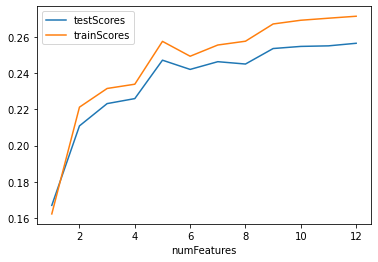

In [87]:
df = pd.DataFrame(data={'testScores':testScores,
                        'trainScores':trainScores,
                        'featureNames': featureNames})
df.reset_index(inplace=True)
df.rename(columns={'index':'numFeatures'}, inplace=True)
df.numFeatures = df.numFeatures + 1
df.plot(x='numFeatures', y=['testScores','trainScores'])

In [88]:
df

,numFeatures,testScores,trainScores,featureNames
0,1,0.166963,0.162235,[temp]
1,2,0.210924,0.221286,"[temp, yr_1]"
2,3,0.223252,0.231620,"[temp, windspeed, yr_1]"
3,4,0.226016,0.233975,"[temp, windspeed, yr_1, mnth_8]"
4,5,0.247262,0.257670,"[temp, windspeed, season_3, season_4, yr_1]"
5,6,0.242160,0.249445,"[temp, windspeed, season_3, yr_1, mnth_5, mnth_8]"
6,7,0.246431,0.255658,"[temp, windspeed, season_2, season_3, yr_1, mn..."
7,8,0.245134,0.257756,"[temp, windspeed, season_2, season_3, yr_1, mn..."
8,9,0.253709,0.267294,"[temp, windspeed, season_2, season_3, season_4..."
9,10,0.254884,0.269353,"[temp, windspeed, season_2, season_3, season_4..."


We can use temp which make it least different